# Chapter 4. Structural Causal Models

**Structural equation modeling (SEM)** is a family of various methods scientists use in experimental and observational research. SEMs, also called **Structural Causal Models (SCM)**, are used to represent and analyze causal relationships among variables. The SCM model specifies the relationships between the variables through a system of linear equations, where the observed variables are considered as effects of the latent variables and potentially other observed variables. The structural model also includes error terms to account for measurement error and unobserved factors.


In an SCM, variables are the equivalent of nodes in a DAG, and causal relationships are described using structural equations. Each variable is associated with a structural equation that expresses how it depends on its direct causes or parent variables in the causal graph. 

SCMs allow researchers to simulate the system's behavior under different interventions or manipulations by modifying the structural equations or setting specific values for variables. They provide a formal framework for reasoning about counterfactuals and estimating causal effects in the presence of confounding variables.



## Graphs vs. Structural Equations

We saw in Chapter 3 that: 
- **G+** Graph is an excellent tool for communicating with subject matter experts. 
- **G+** Graph can be a helpful way to translate assumptions into a formal model. 
- **G+** Graphs are also useful to see what restrictions (if any) our model puts on the joint distribution of the observed data.

- **E+** As the model becomes more complicated, the equations get a lot more friendly to work with.
- **E+** Equations may help you resist the urge to oversimplify.


![img](img/ch4/Causal-Graphs-Advantages.png)


## Structural Causal/Equation Model

An **Structural Causal Model (SCM)** or **Structure Equation Model (SEM)** consists of:

1. *Endogenous variables* $X = {X_1 , ..., X_J }$ 
    - Affected by other variables in the model
    - May or may not be observed

<br/>

2. *Background (exogenous) variables* $U = {U_1 , ..., U_J }$ 
    - Not affected by other factors in the model
    - Not observed
    - $U_j$ is also called noise or error variables and $U$ is a joint distribution over noise variables.
    - Each endogenous variable $X_j$ has an error $U_j$.

<br/>

3. *Functions* $F = \lbrace f_{X_1} , ... , f_{X_J} \rbrace $
    - The functions $F$ define a set of $J$ **structural equations** for each of the endogenous variables:
    
    $X_j = f_{X_j}(Pa(X_j),U_{X_j}), j = 1,...,J$
    
    $Pa(X_j) \subseteq X \backslash Xj$
    
where $Pa(X_j)$ called **parents** of $X_j$.

* The strutue of $F$ is based on prior knowledge of the subject matter, theory, prior research, or causal DAG.
* We sometimes call the elements of $PA_j$ not only parents but also **direct causes** of $X_j$, 
* We call $X_j$ a **direct effect** of each of its **direct causes** $PA_j$. 



<br/>

See a short video on [SCM](https://www.youtube.com/watch?v=dQeRqb0N6gs&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=33) made by Brady Neal.


## Making a Graph for a SCM with W-A-Y Example: 

The graph $\mathcal{G}$ of an SCM $\mathfrak{C}$ is obtained by creating one node for each $X_j$ and drawing directed edges from each parent in $PA_j$ to $X_j$. 

![img](img/ch4/Graph-SEM.png)

- Connect parents to children with a directed link.


- Each endogenous variable $X_j$ has an error $U_j$ term or relys on a exogenous variable.


- Potential dependence between errors or exogenous variables $U_j$ encoded in dashed lines/double headed errors.


- We assume this graph $\mathcal{G}$ is acyclic, without directed cycles/feedback loops.
    - Instead feedback loops, we can use temporal ordering.
    - In other words, we can extend graph (and corresponding structural equations) over time.
    

- We will work with recursive SCM. There is ordering between $X={X_1,...,X_J}$ such that each $X_j$ is a function of a subset $Pa(Xj)$ of its **predecessors**.
    - Causes always precede their effects
    - A natural source of ordering is *time*

    $X_j = f_{X_j}(Pa(X_j),U_{X_j}), j = 1,...,J $ 

    $Pa(X_j) \subseteq {X_1, ..., X_{j-1}}$

<br/><br/>


### Causal Exclusion in the W-A-Y Example:

Exclusion restrictions on the graph encoded through absence of arrows between variables.
- Absence of arrow means no direct effect

![img](img/ch4/Graph-SEM-Excluded.png)

<br/><br/>


### Independence Assumptions in the W-A-Y Example:
- Absence of double headed arrows between background (exogenous) variables or errors $U$ means those two errors are **independent**.
    - It is an assumption on distribution $P_U$.
    - We assume there is no unmesaured common cause between those two $U_j$

![img](img/ch4/Graph-SEM-Independence.png)


<div class="alert alert-block alert-info">

**Proposition 4.1. (SCM Entailed Distributions):** An SCM $\mathfrak{C}$ defines a unique distribution over the variables $X = ({X_1},...,{X_J})$ such that: 
    $$X_j = f_{X_j}(Pa(X_j),U_{X_j})$$  for  $j = 1,...,J$
    
We refer to it as the entailed distribution $P^\mathfrak{C}_X$ and sometimes write $P_X$.

</div>


<br/>

## Interventions on a SCM

When performing interventions in an SCM, we set the value of a particular variable to a specific value or distribution, typically referred to as the intervention or treatment. By doing so, the researcher can observe how the changes propagate through the structural model and affect the values of other variables, providing insights into the causal relationships between variables.

- When we intervene on variable $X_j$ and set it to a specific outcome. We expect that this intervention changes the distribution of the system compared to its earlier behavior without intervention. 

    - Even if variable $X_j$ was causally influenced by other variables before, it is now influenced by nothing else. 
    - $X_j$ has no more causal parents. 

- The autonomy of structural equations means that we can make a targeted modification to the set of equations in order to represent our intervention of interest.


<div class="alert alert-block alert-info">

**Proposition 4.2. (Intervention Distribution):** [source](https://mitpress.mit.edu/books/elements-causal-inference) 

Consider an SCM $\mathfrak{C}$ and its entailed distribution $P^\mathfrak{C}_X$. We replace one (or several) of the structural assignments to obtain a new SCM $\tilde{\mathfrak{C}}$. 

<br/>

Assume that we replace the assignment for $X_j$ by:

$X_j = \tilde{f}_{X_j}(\tilde{Pa}(X_j),U_{X_j})$.

<br/>

We then call the entailed distribution of the new SCM $\tilde{\mathfrak{C}}$ an **intervention distribution** and say that the variables which structural assignment we have replaced have been **intervened** on. We denote the new distribution $P^{\tilde{\mathfrak{C}}}_X$ by:

$P^{\tilde{\mathfrak{C}}}_X = P^{\mathfrak{C} ; do(\tilde{f}_{X_j}(\tilde{Pa}(X_j),U_{X_j}))}_X$.

<br/>

The set of noise (error) variables in $\tilde{\mathfrak{C}}$ now contains both some “new” $\tilde{U}$ 's and some "old" $U$'s, all of which are required to be jointly independent.

</div>


<br/><br/>

### Intervention on A in the A-Y Example:

- We intervene on the system to set $A=1$ and we replace $f_A$ with constant function $A=1$.

![img](img/ch4/Grpah-SEM-Intervene.png)

- $Y_a(u)$ is defined as the solution to the equation $f_Y$ under an intervention on the system of equations to set $A=a$ (with input $U_Y=u$).
- We can think of $u$ as a particular realization of (values for) the background factors
- $P_{U_Y}$ and $F$ induce a probability distribution on $Y_a$ just as they do on $Y$.
- $Y_a$ is a **post-intervention** or a **counterfactual** random variable.


<br/><br/>

### Intervention on Targets in a Simple Prediction Example:

This example considers prediction. It shows that even though some variables may be good predictors for a target variable $Y$ , intervening on them may leave the target variable unaffected. 

![img](img/ch4/Exp_Predictors_Intervention_Targets.png)

Consider the following SCM $\mathfrak{C}$:

$$
\begin{cases}
 X_1 = U_{X_1}\\
 Y = X_1 + U_Y\\
 X_2 = Y + U_{X_2}
\end{cases}
$$

with following distribution being jointly independent:

$$
\begin{cases}
U_{X_1} \stackrel{iid}{\sim} \mathcal{N}(0,1) \\
U_{X_2} \stackrel{iid}{\sim} \mathcal{N}(0,0.1) \\
U_{Y} \stackrel{iid}{\sim} \mathcal{N}(0,1) 
\end{cases}
$$

<br/>

**Case 1, Intervene on $X_2$:** 

We are interested in predicting $Y$ from $X_1$ and $X_2$. Clearly, $X_2$ is a better predictor for $Y$ than $X_1$ is. For example, a linear model without $X_2$ leads to a (significantly) larger mean squared error than a linear model without $X_1$ would.


However, if we want to study $Y$, intervention on $X_2$ is useless. In other words, no matter how strongly we intervene on $X_2$, the distribution of $Y$ remains unaffected

$P^{\mathfrak{C} ; do(X_2 = \stackrel{\sim}{U})}_Y = P^{\mathfrak{C}}_Y$

<br/>

**Case 2, Intervene on $X_1$:** 

An intervention on $X_1$, however, does change the distribution $Y$.

$P^{\mathfrak{C} ; do(X_1 = \stackrel{\sim}{U})}_Y = \mathcal{N}(E(U_Y) + E(\stackrel{\sim}{U}), var (U_Y) + var(\stackrel{\sim}{U}))$ 


$P^{\mathfrak{C} ; do(X_1 = \stackrel{\sim}{U})}_Y \neq P^{\mathfrak{C}}_Y$

<br/>

## Calculating Intervention Distributions

This section is based on Chapter 6 of the Element of Causal Inference Book, [link](https://mitpress.mit.edu/9780262037310/elements-of-causal-inference/). 

We use a trivial but powerful **invariance** statement for calculating intervention distributions in SCM $\mathfrak{C}$ with $p a(j):=\mathbf{P A}_{j}^{\mathcal{G}}$:

$$
p^{\tilde{\mathfrak{C}}}\left(x_{j} \mid x_{p a(j)}\right)=p^{\mathfrak{C}}\left(x_{j} \mid x_{p a(j)}\right)
$$ 
<p style='text-align: center;'> (Eq.1) </p>

where the SCM $\tilde{\mathfrak{C}}$ is constructed from $\mathfrak{C}$ by **intervening** on (some) $X_k$ but not on $X_j$.

- Equation above shows that causal relationships are **autonomous** under interventions. This property is therefore sometimes called **autonomy**. It means if we intervene on a variable, then the other mechanisms remain invariant.
- if we dont change $X_j$ and its parents and change a $X_k$, the  $p(x_{j} \mid x_{p a(j)})$ remains unchanged.


The autonomy formula is the base for the **G-formula** (Robins, 1986), **truncated factorization** (Pearl, 1993), or **manipulation theorem** (Spirtes, 2000) that we have seen in Chapter 3. To refresh our minds, we repeat those formulas.  

We start with an SCM $\mathfrak{C}$ with structural assignments with density $p^{\mathfrak{C}}$:

$$
X_{j}:=f_{j}\left(X_{pa(j)}, U_{j}\right), \quad j=1, \ldots, d
$$
<p style='text-align: center;'> (Eq.2) </p>

<br/><br/>

Using Markov property, we have:

$$
p^{\mathfrak{C}}\left(x_{1}, \ldots, x_{d}\right)=\prod_{j=1}^{d} p^{\mathfrak{C}}\left(x_{j} \mid x_{p a(j)}\right)
$$
<p style='text-align: center;'> (Eq.3) </p>

<br/><br/>

We do an **intervention**, so the SCM $\mathfrak{\tilde{C}}$ evolves from $\mathfrak{C}$ after the operation $do\left(X_{k}:=\tilde{U}_{k}\right)$, where using random distribution $\tilde{U}_{k}$ changes the density to $\tilde{p}$. Again, we use the Markov assumption:

$$
\begin{aligned}
p^{\mathfrak{C} ; d o\left(X_{k}:=\tilde{U}_{k}\right)}\left(x_{1}, \ldots, x_{d}\right) &=\prod_{j \neq k} p^{\mathfrak{C} ; d o\left(X_{k}:=\tilde{U}_{k}\right)}\left(x_{j} \mid x_{p a(j)}\right) \cdot p^{\mathfrak{C} ; d o\left(X_{k}:=\tilde{U}_{k}\right)}\left(x_{k}\right) \\
&=\prod_{j \neq k} p^{\mathfrak{C}}\left(x_{j} \mid x_{p a(j)}\right) \tilde{p}\left(x_{k}\right) .
\end{aligned}
$$
<p style='text-align: center;'> (Eq.4) </p>


- **The *(Eq.4)* allows us to compute an interventional statement (left-hand side) from observational quantities (right-hand side).**<font/>

- **In other words, Eq.4 allows us to compute statements about intervention distributions even though we have never seen data directly from the intervention.**


We can rewrite interventional statement in *(Eq.4)* as following to see an special case:

$$
p^{\mathfrak{C} ; d o\left(X_{k}:=a\right)}\left(x_{1}, \ldots, x_{d}\right)=\left\{\begin{array}{cl}
\prod_{j \neq k} p^{\mathfrak{C}}\left(x_{j} \mid x_{p a(j)}\right) & \text { if } x_{k}=a \\
0 & \text { otherwise }
\end{array}\right.
$$
<p style='text-align: center;'> (Eq.5) </p>

<br/><br/>


We have seen in Chapter 2 that conditioning and intervening (using $do(*)$) are usually two different operations. However, these operations become identical for variables with no parents (source variables or exogenous variables). 

Let us assume that $X_1$ is such a source node without loss of generality. Then, we have:

$$
\begin{aligned}
p^{\mathfrak{C}}\left(x_{2}, \ldots, x_{d} \mid x_{1}=a\right) &=\frac{p\left(x_{1}=a\right) \prod_{j=2}^{d} p^{\mathfrak{C}}\left(x_{j} \mid x_{p a(j)}\right)}{p\left(x_{1}=a\right)} \\
&=p^{\mathfrak{C} ; d o\left(X_{1}:=a\right)}\left(x_{2}, \ldots, x_{d}\right) .
\end{aligned}
$$
<p style='text-align: center;'> (Eq.6) </p>


**Eq. 4 and Eq.5** may be confusing. To better understand thier application, let's see the following example...



### Example for Calculating Intervention in a SCM: Kidney Stone Treatments

This example is from a famous data set for the success rates of two treatments for kidney stones. It is a classic example of Simpson’s paradox and also used in [Bottou et al., 2013](https://jmlr.org/papers/v14/bottou13a.html), [Charig et al., 1986](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1339981/). 

<img src="img/ch4/Kidney-stones-xray.png" width="300">



Out of **700 patients**: 

* **350** were treated with open surgery (treatment $T = A$, with 78% recovery rate)
* the other **350** were treated with percutaneous nephrolithotomy ($T = B$, with 83% recovery rate), a surgical procedure to remove kidney stones by a small puncture wound. 


If we do not know anything other than the overall recovery rates and neglect side effects, many people would prefer treatment $B$ if they had to decide. Right? (Assume we dont know about the Simpson's paradox)


The table below shows the data.

<img src="img/ch4/Kidney-stones.png" width="500">


### Solution Part 1: Avoiding Simpson Paradox with Intervention

Observing the data in more detail, we can categorize kidney stones into small and large stones. Although the overall success rate of treatment $B$ seems better, we realize that open surgery (Treatment $A$) performs better in both patients with small kidney stones and patients with large kidney stones. 

**How do we deal with this inversion of conclusion?**


**First Viewpoint:** 

- Larger stones are more severe than small stones, and treatment had to deal with many more difficult cases (even though the total number of patients assigned to $A$ and $B$ are equal). This is why treatment $A$ can look worse than $B$ on the entire population but better in both subgroups. 
 - 263 out of 350 patients in treatment $A$ have large stones.
 - just 80 patients out of 350 in treatment $B$ have large stones.

<br/>

- The imbalance in assignment could, for example, arise if the medical doctors expect treatment $A$ to be better than treatment $B$ and therefore assign the difficult cases with large stones to treatment $A$ with a higher probability. 

**Second Viewpoint:** 

- We propose to use the language of interventions to formulate the precise question we are interested in. 

- Our goal is not whether treatment $T = A$ or treatment $T = B$ was more successful in this particular study but how the treatments outcomes compare when:
 - $P^{\mathfrak{C} ; d o(T:=A)}$, or we force all patients to take treatment $A$. 
 - $P^{\mathfrak{C} ; d o(T:=B)}$, or we force all patients to take treatment $B$. 
 - $P^{\mathfrak{C} ; d o\left(T:=\tilde{N}_{T}\right)}$, or each patient is assigned randomly to one of the treatments.

<br/>

- These three situations concern an **intervention distribution $P^{\mathfrak{C} ; d o()}$** that is different from the **observational distribution $P$**. 


### Solution Part 2: Compute Intervention Distributions $P^{\mathfrak{C} ; d o(T:=A)}, P^{\mathfrak{C} ; d o(T:=B)}, \text { or } P^{\mathfrak{C} ; d o\left(T:=\tilde{N}_{T}\right)}$

We assume the true underlying SCM $\mathfrak{C}$ allows for the following graph where $Z$ is the size of the stone, $T$ the treatment, and $R$ the recovery (all binary).

<img src="img/ch4/Kidney-stones-graph.png" width="500">


Some points from the graph:

- The recovery is influenced by the treatment and the size of the stone. 
- The treatment itself depends on the size. 
- A large proportion of difficult cases was assigned to treatment $A$,the open surgery. 

<br/>


We consider two diffrent variation of SCM $\mathfrak{C}$ based on the type of the treatment:

- We force all patients to take treatment $A$: SCM $\mathfrak{C}_A$ obtained after replacing the structural assignment for $T$ with $T := A$ with corresponding probability distributions $P^{\mathfrak{C}_A}$

- We force all patients to take treatment $B$: SCM $\mathfrak{C}_B$ obtained after replacing the structural assignment for $T$ with $T := B$ with corresponding probability distributions $P^{\mathfrak{C}_B}$

Given that a patient is diagnosed with a kidney stone without knowing its size, we should base our choice of treatment on a comparison between:

$$
\begin{cases}
&\mathbb{E}^{\mathfrak{C}_{A}} R=P^{\mathfrak{C}_{A}}(R=1)=P^{\mathfrak{C} ; d o(T:=A)}(R=1) \\
&\mathbb{E}^{\mathfrak{C}_{B}} R=P^{\mathfrak{C}_{B}}(R=1)=P^{\mathfrak{C} ; d o(T:=B)}(R=1)
\end{cases}
$$
<p style='text-align: center;'> (Eq.7) </p>

Given that we have observed data from $\mathfrak{C}$, **how can we estimate these quantities?**

Below is the calculation of $P^{\mathfrak{C}_{A}}(R=1)$.
Remember it is given that a patient is diagnosed with a kidney stone without knowing its size,

$$
\begin{aligned}
P^{\mathfrak{C}_{A}}(R=1) &=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1, T=A, Z=z) \\
&=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}_{A}}(T=A, Z=z) \\
&=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}_{A}}(Z=z) \\
& \stackrel{(Eq.1)}{=} \sum_{z=0}^{1} P^{\mathfrak{C}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}}(Z=z) .
\end{aligned}
$$
<p style='text-align: center;'> (Eq.8) </p>

<br/>

The last step of *Eq.8* achieved from the invariance equation (Eq.1). Using observational data in the table above, we can estimate $P^{\mathfrak{C}_{A}}(R=1)$. 

In words, it means the probability of recovery if we force all patients to use treatment $A$ including those ones who has small and big stones is:

$$
P^{\mathfrak{C} ; d o(T:=A)}(R=1) = P^{\mathfrak{C}_{A}}(R=1) \approx 0.93 \cdot \frac{357}{700}+0.73 \cdot \frac{343}{700}=0.832
$$
<p style='text-align: center;'> (Eq.9) </p>

<br/>

Similarly, we can calculate:

$$
P^{\mathfrak{C} ; d o(T:=B)}(R=1) = P^{\mathfrak{C}_{B}}(R=1) \approx 0.87 \cdot \frac{357}{700}+0.69 \cdot \frac{343}{700} \approx 0.782
$$
<p style='text-align: center;'> (Eq.10) </p>


**Therefore, we conclude that we would rather go for treatment $A$. What do we see in the table?!**

<br/>

We also see that the **average causal effect (ACE)** for this binary treatments is positive.

$$
P^{\mathfrak{C}_{A}}(R=1)-P^{\mathfrak{C}_{B}}(R=1) \approx 0.832-0.782
$$
<p style='text-align: center;'> (Eq.11) </p>

<br/>

Notice that intervention is different from simple conditioning (the problem with Simpson paradox). 

In this case conditioning has even the opposite sign of the ACE.

$$
P^{\mathfrak{C}}(R=1 \mid T=A)-P^{\mathfrak{C}}(R=1 \mid T=B)=0.78-0.83
$$
<p style='text-align: center;'> (Eq.12) </p>

<br/>

This kidney stine example highlights the difference between **intervening** and **conditioning**. 

In terms of densities, it reads:

$$
p^{\mathfrak{C} ; d o(T:=t)}(r)=\sum_{z} p^{\mathfrak{C}}(r \mid z, t) p^{\mathfrak{C}}(z) \neq \sum_{z} p^{\mathfrak{C}}(r \mid z, t) p^{\mathfrak{C}}(z \mid t)=p^{\mathfrak{C}}(r \mid t) .
$$
<p style='text-align: center;'> (Eq.13) </p>

<br/>

See a short video on [Interventions with SCMs](https://www.youtube.com/watch?v=f-7AgoMlrnE&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=34) made by Brady Neal.

## More on Do-Calculus

So far, we have talked about causality in terms of interventions. In simple words, we say that $X$ causes $Y$ if an intervention in $X$ changes $Y$, while intervention in $Y$ does not necessarily result in a change in $X$. Remeber the "Simple Prediction Example" that we have seen.

<br/>

The **do-operator** is a mathematical representation of physical intervention. For example, in our $W → A → Y$ model, we can simulate an intervention in $A$ by deleting all the incoming arrows to $A$, and manually setting $A$ to some value $a_0$.


<img src="img/ch4/do-operator.png" width="400">

For example, suppose we want to ask, *will increasing the marketing budget boost Smoked Salmon sales?*

If we have a causal model that includes marketing spending and sales, we can simulate what would happen if we were to increase the marketing budget and assess whether the change in Smoked Salmon sales is worth it. In other words, we can *evaluate the causal effect* of marketing on sales. 

<br/>

<font color='blue'>**The importance of do-operator is that it allows us to simulate experiments, given we know the causal model. See Eq.4 again!**<font/>

<br/>
    
See a short video on [Do-Operator](https://www.youtube.com/watch?v=U8t2PsN4hIc&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=28) made by [Brady Neal](https://www.bradyneal.com/causal-inference-course).



<font color='red'> Pass<font/>

## Three Rules of Do-Calculus


Following is a complete set of three rules that outline how to use the **do-operator** suggested by [Judea Pearl, 2009](http://bayes.cs.ucla.edu/BOOK-2K/). 

Notice that **do-calculus** can translate **interventional distributions** (i.e., probabilities with the do-operator) into **observational distributions** (i.e., probabilities without the do-operator). This can be seen by rules 2 and 3. 

Given a graph $\mathcal{G}$ and disjoint subsets $\mathbf{X, Y, Z, W}$, we have:


### Rule 1. Insertion/deletion of observations:
    
$$
p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x})}(\mathbf{y} \mid \mathbf{z}, \mathbf{w})=p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x})}(\mathbf{y} \mid \mathbf{w})
$$

if $\mathbf{Y}$ and $\mathbf{Z}$ are d-separated by $\mathbf{X,W}$ in a graph where incoming edges in $\mathbf{X}$ have been removed. 

In simple words, $\mathbf{Z}$ is irrelevant to $\mathbf{Y}$.

<br/>

### Rule 2. Action/observation exchange:

$$
p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x}, \mathbf{Z}=\mathbf{z})}(\mathbf{y} \mid \mathbf{w})=p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x})}(\mathbf{y} \mid \mathbf{z}, \mathbf{w})
$$

if $\mathbf{Y}$ and $\mathbf{Z}$ are d-separated by $\mathbf{X,W}$ in a graph where incoming edges in $\mathbf{X}$ and outgoing edges from $\mathbf{Z}$ have been removed. 

In simple words, $\mathbf{X \cup W}$ blocks all back-door paths from $\mathbf{Z}$ to $\mathbf{Y}$.

<br/>

### Rule 3. Insertion/deletion of actions:

$$
p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x}, \mathbf{Z}=\mathbf{z})}(\mathbf{y} \mid \mathbf{w})=p^{\mathfrak{C} ; d o(\mathbf{X}:=\mathbf{x})}(\mathbf{y} \mid \mathbf{w})
$$

if $\mathbf{Y}$ and $\mathbf{Z}$ are d-separated by $\mathbf{X,W}$ in a graph where incoming edges in $\mathbf{X}$ and $\mathbf{Z(W)}$ have been removed. Here $\mathbf{Z(W)}$ is the subset of nodes in $\mathbf{Z}$ that are not ancestors of any node in $\mathbf{W}$ in a graph that is obtained from $\mathcal{G}$ after removing all edges into $\mathbf{X}$.

In simple words, there is no causal path from $\mathbf{Z}$ to $\mathbf{Y}$.
    
<br/>
    
See a short video on [Do-Calculus Rules](https://www.youtube.com/watch?v=M-mF6bXlxHI&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=40) from Brady Neal.


## Causal Models and Counterfactuals

Humans often think in the form of **counterfactuals**: *“I should have taken the train.”* or *“We should have invested in Bitcoin in January 2019!”* are only a few examples. 


Counterfactuals have a long history as humankind. For example, Titus Livius discusses in 25 BC what would have happened if Alexander the Great had not died on his way back from Persia and had attacked Rome. Livy argues that Rome and Carthage would have joined forces to crush the Macedonian army. [Geradin and Girgenson, 2011](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1970917). 


<img src="img/ch4/Alexander_mosaic.jpeg" width="400">


<br/><br/>

In structural equation models, variables are represented as functions of other variables, capturing the causal relationships among them. By manipulating the values of variables in the model and observing the resulting changes in the outcome variable, researchers can estimate the **counterfactual outcome** or what would have happened under different conditions. 


<div class="alert alert-block alert-info">

**Definition 4.3. (Counterfactuals):** Counterfactual corresponds to updating the exogenous vaiables of an SCM $\mathfrak{C}$ (by conditioning) and then performing an intervention.

Consider an SCM $\mathfrak{C} = (S,P_U)$ over variables $X$. Given some observations $x$, we define a *counterfactual SCM* by replacing some exogenous variables (random distributions or noise):

$$
\mathfrak{C}_{\mathbf{X}=\mathbf{x}}:=\left(\mathbf{S}, P_{\mathbf{U}}^{\mathfrak{C} \mid \mathbf{X}=\mathbf{x}}\right)
$$

where 
$$
P_{\mathbf{U}}^{\mathfrak{C} \mid \mathbf{X}=\mathbf{x}} = P_{\mathbf{U} \mid \mathbf{X}=\mathbf{x}}^{}
$$

The new set of exogenous variables need not be jointly independent anymore. 

*Counterfactual* statements can now be seen as *do-statements* in the new counterfactual SCM.

</div>

<br/>

See a short video on [Counterfactuals](https://www.youtube.com/watch?v=f8PEpthLlN4&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=81) made by Brady Neal.


<br/>

### Example for Computing Counterfactuals: a 3 Integers Model

This example is from [Elements of Causal Inference Book, Chapter 6](https://mitpress.mit.edu/books/elements-causal-inference). 
Consider the following SCM $\mathfrak{C}$:

$$
\begin{cases}
X = U_X \\
Y = X^{2} + U_Y\\
Z = 2Y + X + U_Z
\end{cases}
$$

with uniformly distributed noise values on the integers between −5 and 5:

$$
U_{X}, U_{Y}, U_{Z} \stackrel{\text { iid }}{\sim} \mathrm{U}(\{-5,-4, \ldots, 4, 5\})
$$

<br/>

**Case 1: Observation:** 

We assume that we observe $(X,Y,Z) = (1,2,4)$. We have a observational statement: “ If we observe $X = 1$, $Y = 2$, and $Z = 4$, then Noise values will be $(U_X , U_Y , U_Z) = (1, 1, -1)$"

Then $P_{\mathbf{U}}^{\mathfrak{C} \mid \mathbf{X}=\mathbf{x}}$ puts a point mass on $(U_X , U_Y , U_Z) = (1, 1, -1)$ because here all noise terms can be uniquely reconstructed from the observations.



<br/>

**Case 2: Counterfactual:** 

Agian, we assume that we observe $(X,Y,Z) = (1,2,4)$. Now, we also have a counterfactual statement: “$Z$ would have been 11 if we had $X$ been set to 2." We only changed $U_X$, $U_Y , U_Z$ reamin unchanged.

Mathematically, this means that $P_{\mathbf{Z}}^{\mathfrak{C} \mid \mathbf{X}=\mathbf{x};do(X=2)} = 11$ or it has $Z$ a point mass on 11. $Y$ would have been 5 if we had $X$ been set to 2.


Counterfactuals notation may looks quite complicated. The following image provides further clarification:

![img](img/ch4/Counterfactuals_notation.png)

<br/>

See a short video on [Computing Counterfactuals](https://www.youtube.com/watch?v=wuYda40rqgo&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=82) made by Brady Neal.


<br/><br/>

## Total Causal Effect

We define the existence of a total causal effect as follows based on [Judea Pearl, 2009](https://ftp.cs.ucla.edu/pub/stat_ser/r350.pdf) and Chapter 6 of [Elements of Causal Inference](https://mitpress.mit.edu/books/elements-causal-inference).

<div class="alert alert-block alert-info">

**Definition 4.4. (Total Causal Effect):** Given an SCM $\mathfrak{C}$ over nodes $X$, there is a total causal effect from $X$ to $Y$ for some exogenous variables $\tilde{U}_{X}$ (random distribution or noise) if and only if:

$$X \not\!\perp\!\!\!\perp Y \quad  in  P_{\mathbf{X}}^{\mathfrak{C} ; do\left(X:=\tilde{U}_{X}\right)}$$

</div>

<br/>

The existence of a total causal effect is also related to the existence of a directed path in the corresponding graph $\mathcal{G}$. The correspondence, however, is not one-to-one. While a directed path is necessary for a total causal effect, it is not sufficient.

<br/>

<div class="alert alert-block alert-info">

**Proposition 4.5 (Graphical criteria for Total Causal Effects):** Assume we are given an SCM $\mathfrak{C}$ with a corresponding graph $\mathcal{G}$.

- (i) If there is no directed path from $X$ to $Y$ , then there is no total causal effect.
- (ii) Sometimes there is a directed path but no total causal effect.

</div>



# Build a Structural Causal Model Step-by-Step

<br/>

## Impact of Beer consumption on happiness in HVL-Kronbar 

The example is inspired by [Berkeley's Causality course](https://www.ucbbiostat.com/labs) but adapted to our own Kronbar in Bergen's campus.

### Background

Suppose we are interested in the causal effect of beer consumption on happiness among our students. Specifically, we want to know if the average happiness would be higher if all students consumed beer or if all students did not. From a causal inference perspective, we want to know if there is a connection between beer consumption at Kronbar and happiness.

**What do you think? :)**

<img src="img/ch5/kronbar.jpg" alt="drawing" width="400"/>


As seen in the lecture, we have to first identify the variables (endogenous, exogenous), then draw a DAG to formalize our hypotheses and assumptions. Then we need structural equations to build a SCM from the DAG. 

### STEP 0: Identify Variables and Assumptions

We first need to identify the variables $X$ that are interesting and meaningful for the study (endogenous variables) and background (exogenous) variables $U$ that are unmeasured factors not included in $X$ that determine the values that the $X$ variables take.

- Let $W_1$ be a measure of the student’s pre-exposure characteristic (e.g., sociality).

- Let $W_2$ be an additional baseline variable, indicating whether the student has money to buy alcohol.

- We consider a binary exposure $A$, indicating consumption of beer $(A=1)$ or not $(A=0)$.

- $Y$ denote the outcome happiness.


Finally, we suppose only $W_2$ affects the exposure $A$, but it has no direct effect on the happiness $Y$.

The counterfactuals of interest are:

$$Y_a : a \in \mathcal{A} = \{0,1\}$$

$Y_1$ is the counterfactual happiness if a student drank beer and 

$Y_0$ is the counterfactual happiness if a student did not drink beer.

### STEP 1: Create a DAG

This study can be translated into a directed acyclic graph below based on our background knowldge. 

These variables are related based on the following DAG.

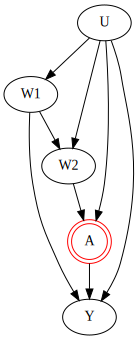

In [1]:
import graphviz as gr

g = gr.Digraph()
g.edge("U", "W1")
g.edge("U", "W2")
g.edge("U", "A")
g.edge("U", "Y")

g.edge("W1", "W2")
g.edge("W2", "A")
g.edge("W1", "Y")
g.edge("A", "Y")
g.node("A", color="red", shape="doublecircle")
g

### STEP 2: Create a SCM


Having the background knowlege and resultant DAG, we can make a SEM. Such a SEM has following variables:

- Endogenous Nodes: $X = (W_1, W_2, A, Y )$
- Exogenous (Unmeasured) Nodes: $U = (U_{W1}, U_{W2}, U_A, U_Y ) \sim \mathbb{P}_U$
- Structural Equations $\mathfrak{C}$


The related structural model $\mathfrak{C}$ has the following general funtional form:

$$
\mathfrak{C} :=
\begin{cases}
     &W_1 = f_{W1}(U_{W1}) \\
     &W_2 = f_{W2}(W_1, U_{W2}) \\ 
     &A = f_A(W_1, W_2, U_A) \\
     &Y = f_Y (W_1, A, U_Y ) 
\end{cases}
$$

**Some notes:**

- we collected some background knowledge first. For example, we looked into similar studies and talked to some experts.
- We specified a model which reflects our limited knowledge of the data-generating system. 
- We did not place any assumptions on the joint distribution of the exogenous nodes. 
- We made only one exclusion restriction on $W_2$ to $A$. 
- Finally, we did not make any assumptions about the functional form of the structural equations. (Not yet)



### STEP 3: Specify the Causal Question

The next step is to translate the scientific question into a formal causal quantity. In this example, we want to know: 

**Is the happiness increases with drinking more beer?**

We can never know both individual treatment effect (drinking beer or not drinking) at the same time, because we only observe one of the potential outcomes at each time. So, we calculate the **average treatment effect (ATE)** to answer our causal question.

The average treatment effect (ATE), defined as:

$$
ATE =
\mathbb{E}_{U,X} (Y_1) - \mathbb{E}_{U,X} (Y_0)
= \mathbb{E}_{U,X} [f_Y(W_1,A=1,U_Y)] - \mathbb{E}_{U,X} [f_Y(W_1,A=0,U_Y)]
$$

$ATE$ is the difference in the expected counterfactual happiness if all students were to drink beer and the expected counterfactual happiness if all students were not to drink beer.

### STEP 4:  Assuming the form of structural equations then simulate data

Because we don't have actual data for this study, we need to generate (simulate) data. So, we consider a particular data generating process $\mathbb{P}_{U,X}$. However, many data generation processes are compatible with our structural equations model or structural causal model $\mathfrak{C}$. 

First, let's specify the structural causal model $\mathfrak{C}$ with more details. We assume we looked at simillar studies in other universities and found following distrbutions for our variables plus functions.


Each of the exogenous factors $U$ is drawn independently from the following distributions:

$$
\begin{cases}
    U_{W1} \sim Uniform(min=0, max=1) \\
    U_{W2} \sim Bernoulli(p=0.5) \\
    U_{A} \sim Normal(\mu=-3, \sigma^2=1) \\
    U_{Y} \sim Normal(\mu=0, \sigma^2=0.3^2)
\end{cases}
$$


Let us also specify the structural equations $\mathfrak{C}$:

$$
\begin{cases}
     &W_1 = f_{W1}(U_{W1}) = \mathbb{I}[U_{W1} < 0.6] \\
     &W_2 = f_{W2}(W_1, U_{W2}) = W_1 + 2U_{W2} \\ 
     &A = f_A(W_1, W_2, U_A) = \mathbb{I} [(1+W_1+2W_2+U_A) > 0] \\
     &Y = f_Y (W_1, A, U_Y )  = 1+2.5A + 3W_1 -0.25A  W_1 + U_y
\end{cases}
$$

where $\mathbb{I}$ is the indicator function equal to 1 if the statement in the brackets is true.

<br/>

In this particular data generating system (one of many compatible with our structural causal model), the expectation of the counterfactual outcome is a linear function of the treatment level $Y_a$:

$$
\mathbb{E}[Y_a] = \mathbb{E}[1+2.5a + 3W_1 -0.25a  W_1 + U_y] =  
$$

$$
1+2.5a + 3\mathbb{E}[W_1] -0.25a \mathbb{E}[W_1] + \mathbb{E}[U_y] =
$$

$$
1+2.5a + 3 \underbrace{\mathbb{E}[W_1]}_{0.6} -0.25a \underbrace{\mathbb{E}[W_1]}_{0.6} + \underbrace{\mathbb{E}[U_y]}_{0}
$$


$W_1$ is a random variable that specifies how students are grouped based on sociality.  

$$P(W_1=1) = P(\mathbb{I}(U_W <0.6)) = P(U_W < 0.6) = 0.6$$


The expected value for $W_1$ is: 

$$\mathbb{E}[W_1] = 1 * P(W_1=1) + 0 * P(W_1=0) = 0.6$$


It means that 60% of students are social.


### STEP 5: Obtain the value of the target causal parameter (e.g, ATE): 

In this example, we can retrieve the ATE in a closed form from the SCM $\mathfrak{C}$.

The ATE value of our target causal parameter $Y$ is:

$$
ATE = \mathbb{E}(Y(a=1) - Y(a=0)) = 
$$


$$
= (1 + 2.5 \cdot 1 + 3 \cdot 0.6 - 0.25 \cdot 1 \cdot 0.6 + 0) - (1 + 2.5 \cdot 0 + 3 \cdot 0.6 - 0.25 \cdot 0 \cdot 0.6 + 0)
$$

$$
= 2.35
$$


The positive ATE means that the expected happiness $Y$ will be higher if all students drink beer compared to the scenario in which none drink beer. 

**BTW, this is just a made-up story.  Always drink responsibly! :-)**

## Run the model in Python

We translate the specific data generating process, which is an element of the causal
model, into a Python simulation.


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

seed = 42
random.seed(seed)
np.random.seed(seed)

n_students = 5000

"""Simulate the background factor"""

#Exogenous variables
Uw1 = np.random.uniform(low=0, high=1, size=n_students)
Uw2 = np.random.binomial(n=1, p=0.5, size=n_students)
Ua = np.random.normal(loc=-3, scale=1, size=n_students)
Uy = np.random.normal(loc=0, scale=0.3, size=n_students)

#Endogenous variables
W1 = (Uw1 <= 0.6).astype(int)
W2 = W1 + 2*Uw2
A = (((1+W1+2*W2+Ua)) >= 0).astype(int)
Y = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy


# Store everything in a dataframe
data = pd.DataFrame(data = 
                    {'W1': W1,
                     'W2': W2,
                     'A': A,
                     'Y': Y})

data.head()

,W1,W2,A,Y
0,1,1,0,3.804414
1,0,0,0,0.969992
2,0,2,1,3.944055
3,1,1,0,4.152629
4,1,3,1,5.761524


Now we intervene on beer consumption parameter $A$ to generate the counterfactual outcomes $Y_0$ and $Y_1$.

In [3]:
# Intervene on the beer consumption
A = 1; Y1 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
A = 0; Y0 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
# Store results
data['Y1'] = Y1
data['Y0'] = Y0
data.head()

,W1,W2,A,Y,Y1,Y0
0,1,1,0,3.804414,6.054414,3.804414
1,0,0,0,0.969992,3.469992,0.969992
2,0,2,1,3.944055,3.944055,1.444055
3,1,1,0,4.152629,6.402629,4.152629
4,1,3,1,5.761524,5.761524,3.511524


We notice that the outcome $Y$ when $A=0$ is equal to the counterfactual outcome $Y_0$. 

Likewise, the outcome $Y$ when $A=1$ is equal to the counterfactual outcome $Y_1$.

Given input of the background factors $U$, the structural equations are deterministic.

In [4]:
ATE = (data['Y1'] - data['Y0']).mean()
ATE

2.35005

The value of $ATE$ using our code is the same as what we calculated analytically. We got the same conclusion.

## References

This chapter contents are highly inspired by the [Elements of Causal Inference (Open Access) book](https://mitpress.mit.edu/books/elements-causal-inference) by By Jonas Peters, Dominik Janzing and [Bernhard Schölkopf](https://www.is.mpg.de/~bs).

We also used examples fom the [Introduction to Causal Inference course](https://www.ucbbiostat.com) by Maya L. Petersen & Laura B. Balzer, UC Berkeley.

Bruno Gonçalves has a helpful [blog](https://medium.data4sci.com/causal-inference-part-iv-structural-causal-models-df10a83be580) on SEM too.